In [1]:
import networkx as nx

import numpy as np

import polars as pl

from scipy.spatial.distance import cosine

import itertools
from collections import defaultdict

import matplotlib.pyplot as plt

This is computationally expensive:
$$
P(g) = \frac{exp[\beta S(g)]}{\sum\limits_{g'} exp[\beta S(g')]}
$$

Where <br>

$\beta = \beta_1, \beta_2, ..., \beta_k$ <br>
$S(G) = S_1(g), S_2(g), ..., S_k(g)$ <br>

So, instead, let <br>

$N(s') =$ number of networks with a particlar statistical signature $S(g') = s'$ <br>

E.g., how many networks have extactly 10 isolates & 64 links?

$$
P(g) = \frac{exp[\beta S(g)]}{\sum\limits_{\red{s'}} \red{N(s')} exp[\beta]}
$$

$$
P(s) = \frac{N(s) exp[\beta s]}{\sum\limits_{s'} N(s') exp[\beta s']}
$$

Instead of asking: <br>
What is the probability of a specific network, <br>

Ask:<br>
What is the probability of observing a network that has a density of 0.1, clustering of 0.3, and an average path length of 2.7?<br>


$$
P(s) = \frac{K(s) exp[\beta s]}{\sum\limits_{s'} K(s') exp[\beta s']}
$$


MLE satifies $ s = E_\beta [s] $

Which $\beta$ s would have given the actual observed statistics as the expected value (for which $\beta$ would the observation be centered at the mean)



In [268]:
# field_name = 'Economics'
# field_name = 'Geophysics'
# field_name = 'Sociology'
# field_name = 'Immunology'
# field_name = 'Neurology'
field_name = 'Law'

G = nx.read_edgelist(f'./output/graphs/citation/{field_name}.edgelist', create_using=nx.DiGraph())
print(G)

DiGraph with 2575 nodes and 9296 edges


DiGraph with 30 nodes and 37 edges


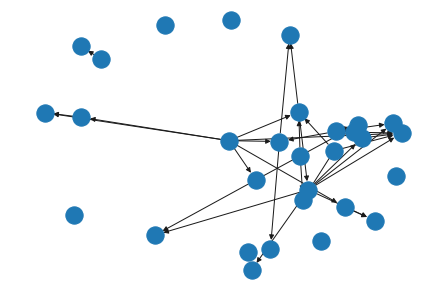

In [269]:
n = 30
most_cited = dict(sorted(nx.in_degree_centrality(G).items(), key=lambda x: x[1], reverse=True)[:n]).keys()

G_sub = G.subgraph(most_cited)

print(G_sub)
nx.draw(G_sub)

# SUGM

$n ≥ 3$ is the number of nodes on which a network is formed
<br>
<br>
We denote a network by $G$, the collection of subsets of $\{1, . . . , n\}$ of size 2 that lists the edges or links that are present in its graph

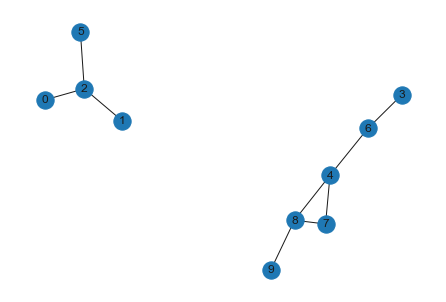

In [368]:
n = 10
g = nx.erdos_renyi_graph(n=n, p=0.3)
nx.draw(g, with_labels=True)

In [369]:
X = np.random.random(size=(len(g), 5))
X

array([[0.55307546, 0.84683971, 0.90629517, 0.58155704, 0.50618801],
       [0.70723647, 0.17256656, 0.54445891, 0.90180014, 0.99358733],
       [0.79991375, 0.06751057, 0.60912193, 0.15896007, 0.05637427],
       [0.77215666, 0.45023332, 0.47095814, 0.37691491, 0.7111273 ],
       [0.59790929, 0.82263151, 0.56161104, 0.36941097, 0.78740127],
       [0.8553294 , 0.87510435, 0.06547333, 0.88224789, 0.04113895],
       [0.85118683, 0.49888192, 0.66672311, 0.14274369, 0.67544486],
       [0.80486058, 0.808143  , 0.70334666, 0.11890127, 0.52017225],
       [0.881985  , 0.16452632, 0.44869542, 0.23754826, 0.01430229],
       [0.27605059, 0.62944708, 0.47013214, 0.18095228, 0.13081788]])

In [382]:
nodes = list(G.nodes())

dist = {}
for i in range(len(X)):
    for j in range(len(X)):
        if nodes[i] != nodes[j]:
            dist[(nodes[i], nodes[j])] = cosine(X[i], X[j])

list(dist.items())[:10]

[((0, 1), 0.18686698697228654),
 ((0, 2), 0.2650919490328917),
 ((0, 3), 0.10058496316889076),
 ((0, 4), 0.05146858998514425),
 ((0, 5), 0.2338317990173301),
 ((0, 6), 0.10565699639169768),
 ((0, 7), 0.06794442384465083),
 ((0, 8), 0.2676256070098837),
 ((0, 9), 0.04689507346976507),
 ((1, 0), 0.18686698697228654)]

Nodes may have characteristics, such as age, profession, gender, race, caste, etc., that we denote by the vector $X_i$ for a generic $i ∈ \{1, . . . , n\}$

$G_n$ denotes the set of all networks on n nodes

In a subgraph generation model, henceforth SUGM, subgraphs are directly generated, and then the resulting network is the union of all of the links in all of the subgraphs

The model can then be described by a list of probabilities, one for each type of subgraph, where subgraphs can be based on the subgraph shape as well as the nodes’ characteristics.

SUGMs are formally defined as follows. <br>
There are finitely many types of nonempty subgraphs, indexed by $\ell ∈ \{1, . . . , k\}$, on which the model is based – for instance in the links and triangles case $\ell ∈ \{L, T\}$

The $k$ subgraph types are denoted by $(G_\ell)_ {\ell ∈ \{1,...,k\}}$, where each $G_\ell ⊂ G_n$ is a set of possible subgraphs on $m_\ell \leq n$ nodes.

Each pair of subgraphs in $g' \isin G_\ell$ and $g'' \isin G$ are such that there exists a bijection $\pi$ on $\{1, ..., n\}$ for which $ij \isin g'$ if and only if $\pi(i)\pi(j) ∈ g''$.

The definitions of the subgraph types can have restrictions based on node characteristics, for instance, requiring that the characteristics $X_i$ and $X_{\pi(i) }$
be the same – e.g., $G_\ell$ for some $\ell$ could be the set of “triangles that involve one child and two adult nodes”. As an example, the set $G_\ell$ for some $\ell$ could 
be all stars with one central node and four other nodes, and another $\ell$ could be all of the links that involve people of different castes, and so forth.


![Figure1](img/Figure1.png)

**Figure 1.** Examples of subgraphs. <br>
Links could be directed or undirected or even multiplexed (take on multiple edge types) and nodes can have different
characteristic combinations (denoted by node colors and labels).

The probability that various subgraphs form is described by a vector of parameters, denoted $\beta \isin \Beta$, where $\Beta$ is (unless otherwise noted) a compact subset of $[0, 1]^k$. For instance, $\beta = (\beta L, \beta T ) \isin \Beta \subset [0, 1]^2$ in a links and triangles example

A network $g$ on $n$ nodes is randomly formed as follows: <br>
**(1)** Each of the possible subnetworks $g_\ell \isin G_\ell$ forms independently with probability $\beta_\ell$ <br>
**(2)** The resulting network, $g$, is the union of all the links that appear in any of the generated subgraphs <br>

An Example with Node Characteristics. Suppose that nodes come in two colors: blue and red (for instance different genders, age groups, religions, etc., 
and clearly this extends directly to more than two colors). In our example of links and triangles, there are now three types of links: (blue, blue), 
(blue, red), (red, red); and four types of triangles (blue,blue,blue), (blue,blue,red), (blue,red,red), (red,red,red) which comprise the set of subgraphs 
indexed by $\ell$.

![Figure2](img/Figure2.png)

**Figure 2.** Panel (A) shows all possible links and Panel (B) shows all <br>
possible triangles when a node has characteristic $X_i \isin \{red, blue\}$.

Thus, in this example the sets of subgraphs are 

$$
G(blue,blue) = \{ij : X_i = blue, X_j = blue\} 
$$

and 

$$
G(blue,blue,red) = \{ijk : X_i = blue, X_j = blue, X_k = red\}
$$, 

and so forth, as depicted in Figure 2. 

The parameters 

$$
\{\beta (blue,blue), \beta(blue,red), \beta(red,red), \beta(blue,blue,blue), \beta(blue,blue,red), \beta(blue,red,red), \beta(red,red,red)\}
$$,

are the probabilities that the corresponding subgraphs form. One could restrict or enrich the model by having simpler or more complex sets <br>
of parameters – for instance requiring that $\beta (blue,blue) = \beta (red,red)$, or by having preference parameters that govern the probabilities <br>
of various subgraphs forming, as we discuss below. <br>

In [326]:
edges = nx.edges(G)

len(edges)

11

In [327]:
triangles = nx.triangles(G)

len(triangles)

10

In [328]:
cliques = nx.find_cliques(G)
cliques = list(filter(lambda x: len(x) > 2, cliques))

len(cliques)

1

In [329]:
average_shortest_path = nx.average_shortest_path_length(G)

average_shortest_path

2.488888888888889

In [331]:
average_clustering = nx.average_clustering(G)

average_clustering

0.15

In [ ]:
average_degree = nx.average

In [321]:
nx.transitivity(G)

0.16666666666666666

In [339]:
dict_degree = dict(nx.degree(G))
degree = dict_degree.values()

average_degree = sum(degree) / len(degree)
average_degree

2.2

In [333]:
dict_degree_centrality = nx.degree_centrality(G)
degree_centrality = dict_degree_centrality.values()

average_degree_centrality = sum(degree_centrality) / len(degree_centrality)
average_degree_centrality

0.24444444444444452

In [334]:
dict_betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality = dict_betweenness_centrality.values()

average_betweenness_centrality = sum(betweenness_centrality) / len(betweenness_centrality)
average_betweenness_centrality

0.18611111111111112

In [342]:
sorted(nx.jaccard_coefficient(G), key=lambda x: x[2], reverse=True)

[(0, 8, 0.5),
 (5, 7, 0.5),
 (2, 9, 0.4),
 (0, 1, 0.3333333333333333),
 (0, 7, 0.3333333333333333),
 (3, 9, 0.3333333333333333),
 (7, 8, 0.3333333333333333),
 (0, 4, 0.25),
 (0, 5, 0.25),
 (4, 8, 0.25),
 (5, 9, 0.25),
 (6, 9, 0.25),
 (2, 6, 0.2),
 (0, 3, 0.0),
 (1, 2, 0.0),
 (1, 3, 0.0),
 (1, 4, 0.0),
 (1, 5, 0.0),
 (1, 7, 0.0),
 (1, 8, 0.0),
 (1, 9, 0.0),
 (2, 3, 0.0),
 (2, 4, 0.0),
 (3, 5, 0.0),
 (3, 6, 0.0),
 (3, 7, 0.0),
 (3, 8, 0.0),
 (4, 5, 0.0),
 (4, 6, 0.0),
 (4, 7, 0.0),
 (5, 6, 0.0),
 (6, 8, 0.0),
 (6, 7, 0.0),
 (7, 9, 0.0)]

# Graphlets

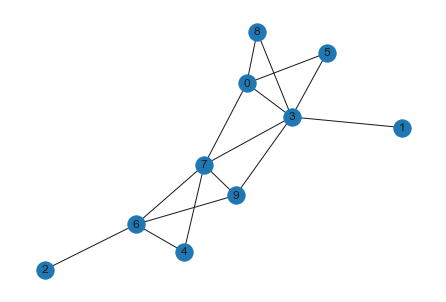

In [277]:
G = nx.erdos_renyi_graph(n=10, p=0.3)
nx.draw(G, with_labels=True)

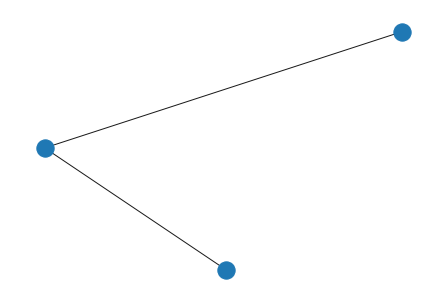

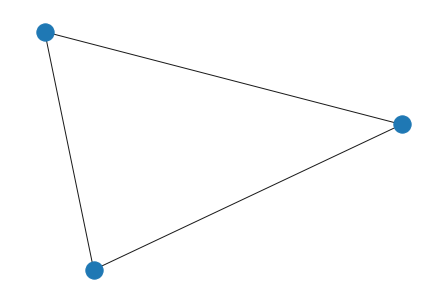

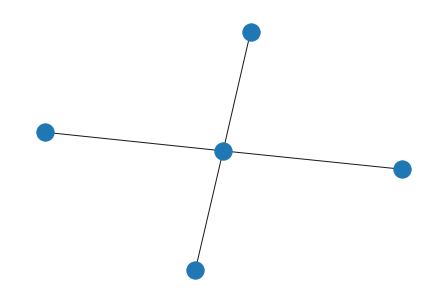

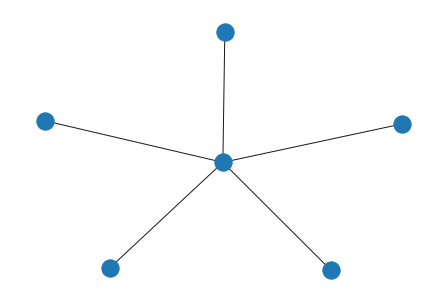

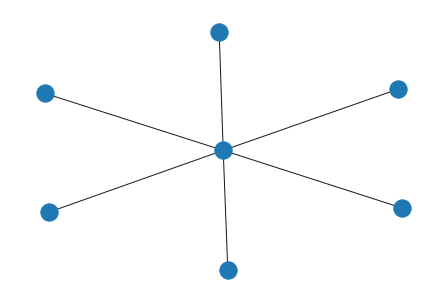

In [295]:
graphlets = {}

open_triangle_graphlet = nx.Graph()
open_triangle_graphlet.add_edges_from([(1, 2), (2, 3)])
graphlets['open_triangle'] = open_triangle_graphlet

closed_triangle_graphlet = nx.Graph()
closed_triangle_graphlet.add_edges_from([(1, 2), (2, 3), (3, 1)])
graphlets['closed_triangle'] = closed_triangle_graphlet

ks = [4, 5, 6]
for k in ks:
    kstar_graphlet = nx.star_graph(n=k)
    graphlets[f'{k}star'] = kstar_graphlet

for _, graphlet in graphlets.items():
    nx.draw(graphlet)
    plt.show()

In [296]:
realised_graphlets = defaultdict(list)
for graphlet_name, graphlet in graphlets.items():
    for sub_nodes in itertools.combinations(G.nodes(), len(graphlet)):
        if nx.is_isomorphic(G.subgraph(sub_nodes), graphlet):
            realised_graphlets[graphlet_name].append(sub_nodes)

In [300]:
realised_graphlets['6star']
realised_graphlets['5star']
realised_graphlets['4star']

[(1, 3, 5, 7, 8), (1, 3, 5, 8, 9)]